#**Sales Prediction**

In [67]:
#importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [68]:
#reading the dataset

df=pd.read_csv("/content/drive/MyDrive/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [69]:
df.shape

(200, 4)

rows are 200 and columns are 4

In [70]:
#column names

df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [71]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [73]:
#checking null values

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no null vaues present in dataset

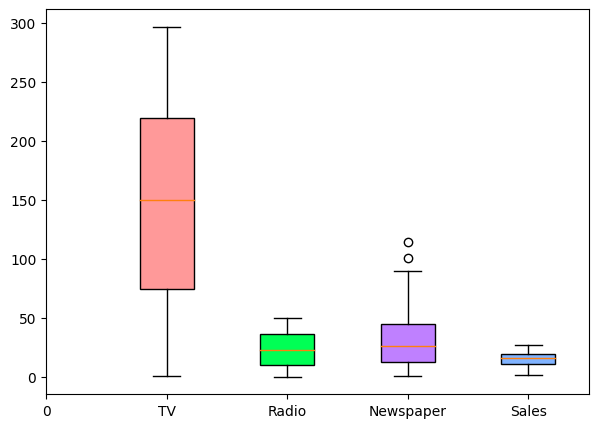

In [74]:
plt.figure(figsize=(7,5))
colors = ['#ff9999', '#00ff55', '#bf80ff', '#80b3ff', '#ffb366']
boxplot=plt.boxplot(df,patch_artist=True)
plt.xticks(range(5),[0,'TV','Radio','Newspaper','Sales'])
for box,color in zip(boxplot['boxes'],colors):
  box.set(facecolor=color)
plt.show()

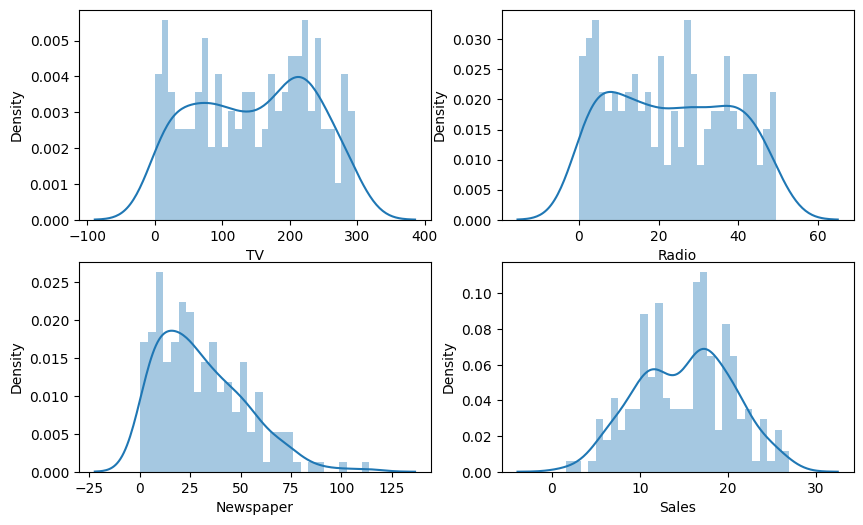

In [75]:

plt.figure(figsize=(10,6))
for i, column in enumerate(df,1):
    plt.subplot(2,2,i)
    sns.distplot(df[column],bins=30)
    plt.xlabel(column)

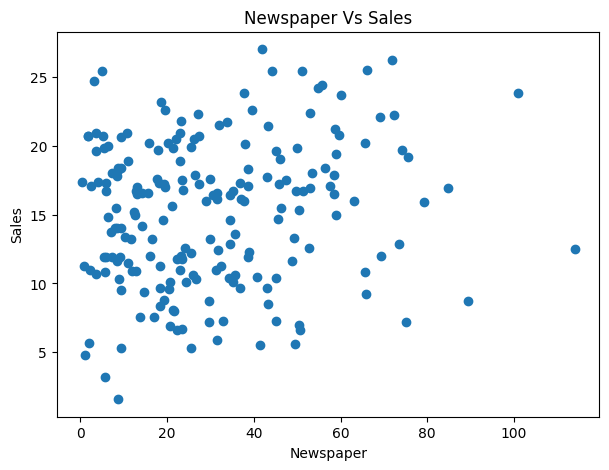

In [76]:
plt.figure(figsize=(7,5))
plt.title("Newspaper Vs Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.scatter(df['Newspaper'],df['Sales'])
plt.show()

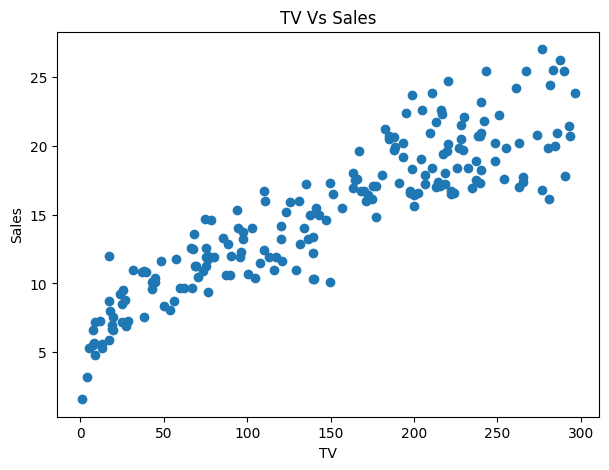

In [77]:
plt.figure(figsize=(7,5))
plt.title("TV Vs Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.scatter(df['TV'],df['Sales'])
plt.show()

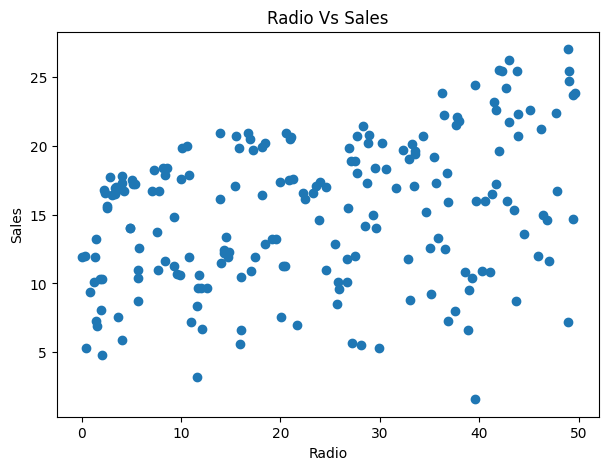

In [78]:
plt.figure(figsize=(7,5))
plt.title("Radio Vs Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.scatter(df['Radio'],df['Sales'])
plt.show()

<Axes: title={'center': 'Corelation'}>

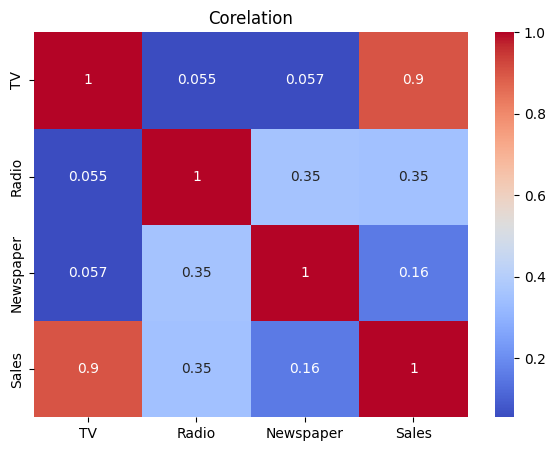

In [79]:
plt.figure(figsize=(7,5))
plt.title("Corelation")
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

**Assigning the variables**

In [80]:
x=df.drop('Sales',axis=1)
y=df['Sales']

**Splitting dataset into train and test data**

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [82]:
x_train.shape,y_train.shape

((160, 3), (160,))

In [83]:
x_test.shape,y_test.shape

((40, 3), (40,))

**LinearRegression Model**

In [84]:
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)


In [85]:
mse=mean_squared_error(y_test,pred)
r2=(100*r2_score(y_test,pred))
print("Mean Squared Error ",mse)
print("r2_score ",r2)

Mean Squared Error  3.9176794539057935
r2_score  86.0796171975714


**Checking Overfitting and Underfitting**

In [86]:
pred1=model.predict(x_train)
mse1=mean_squared_error(y_train,pred1)
r21=(100*r2_score(y_train,pred1))
print("Mean Squared Error ",mse1)
print("r2_score ",r21)

Mean Squared Error  2.411255366566876
r2_score  91.16784470434615


#**Result :** LinearRegression Model performing really well, scoring 91% on the training data and 86% on the test data. This means it's good at making accurate predictions